<a href="https://colab.research.google.com/github/tushar2411/Almabetter-Data-Science/blob/main/myPlay_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
playSdata = pd.read_csv('/content/drive/MyDrive/Alambetter/Capstone Project 1/Play Store App Review Analysis/Play Store Data.csv')

In [73]:
playSdata.shape

(10841, 13)

In [74]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [75]:
playSdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [76]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#1) Data Cleaning

#*We can wee that some column names are having spaces to their names. So we'll replace them with "_" so it will be avoid case sensitivity while analyzing the data*

In [81]:
playSdata.columns = [col.replace(' ','_') for col in list(playSdata.columns)]

In [82]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [77]:
playSdata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [78]:
data1  = playSdata.head()
data2  = playSdata.tail()
concatData = pd.concat([data1,data2],axis=0,ignore_index=True)

In [79]:
concatData

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [80]:
#rows containg null values
playSdata[playSdata['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


clean data

#*We can see in below graph now ratings are under 5*

In [84]:
playSdata[playSdata['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [85]:
playSdata.drop(10472,inplace=True)

In [86]:
playSdata[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


#*We will remove the null in columns which are empty*

In [87]:
print(type(playSdata['Rating']))

<class 'pandas.core.series.Series'>


In [88]:
threshold = len(playSdata) * 0.1
threshold

1084.0

In [89]:
playSdata.dropna(thresh=threshold,axis=1,inplace=True)

In [90]:
print(playSdata.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64


In [91]:
playSdata.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


#*In Rating column we have some null values. To remove these values we'll calculate median of this column by creating function*

In [92]:
playSdata['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [93]:
def cal_median(series):
  return series.fillna(series.median())

In [94]:
playSdata.Rating = playSdata['Rating'].transform(cal_median)

In [95]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

#*Now we will apply mode for same the 'Current_Ver,Android__Ver, Type'*

In [96]:
print(playSdata['Type'].mode())

0    Free
dtype: object


In [97]:
print(playSdata['Current_Ver'].mode())

0    Varies with device
dtype: object


In [98]:
print(playSdata['Android_Ver'].mode())

0    4.1 and up
dtype: object


#*Now we'll fill these categorial values with mode*

In [99]:
playSdata['Type'].fillna(str(playSdata['Type'].mode().values[0]),inplace=True)

In [100]:
playSdata['Current_Ver'].fillna(str(playSdata['Current_Ver'].mode().values[0]),inplace=True)

In [101]:
playSdata['Android_Ver'].fillna(str(playSdata['Android_Ver'].mode().values[0]),inplace=True)

In [102]:
playSdata['Content_Rating'].fillna(str(playSdata['Content_Rating'].mode().values[0]),inplace=True)

In [103]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

#*We can also see that above information about data there is a Price column which has all numeric float values plus there is '$' sign we will remove it and convert into float values.'*

In [104]:
playSdata['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [105]:
playSdata['Price'] = playSdata['Price'].apply(lambda row: str(row).replace('$','') if '$' in str(row) else str(row))

playSdata['Price'] = playSdata['Price'].apply(lambda row: float(row))

playSdata['Price'].sample(20)

2956     0.00
1985     0.00
5173     0.00
6508     0.99
5637     0.00
2417     0.00
7702     0.00
8103     0.00
7008     0.00
3970     0.00
2610     0.00
10104    0.00
10460    1.00
5091     0.00
8076     0.00
3403     2.49
10085    0.00
8704     0.00
3690     0.00
869      0.00
Name: Price, dtype: float64

#*Again we can see that in Reviews column there are object type but these are numeric values. So, we'll convert them completely in Numerical data.*

In [106]:
playSdata['Reviews'] =pd.to_numeric( playSdata['Reviews'],errors='coerce')

#*Also in "Installs" there "+" and "," sign after the value. So, it also to be done as same as "Price"*

In [107]:
playSdata['Installs'].sample(5)

8859            500+
5096            100+
3922    100,000,000+
8775      1,000,000+
4955         10,000+
Name: Installs, dtype: object

In [108]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace("+","") if "+" in str(row) else str(row))

playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace(",","") if "," in str(row) else str(row))

In [116]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: int(row))
playSdata['Installs'].sample(5)

4627     1000000
6352      500000
8194    10000000
1292    10000000
3727     1000000
Name: Installs, dtype: int64

#*For size also "M" and "K" is appearing, Which "M" means MB and "k" means KB we'll remove it and convert it as numeric values.*

In [123]:
# playSdata['Size'].unique()

In [117]:
def reamove(a):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if "M" in a:
    # We Are Replacing "M" and multiplying with 1000000
    a = str(int(float(a.replace("M",""))*1000000))
  if "k" in a:
    # We Are Replacing "k" and multiplying with 1000
    a = str(int(float(a.replace("k",""))*1000))
  if "NaN" in a:
    a = "0"
  else:
    pass
  return a


In [118]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


In [112]:
# Changing the size column values in numeric values
playSdata['Size'] = playSdata['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playSdata['Size'] = pd.to_numeric(playSdata['Size'].map(lambda x: reamove(x)))

#*Now we will handle the duplicates in App column. Because in column app having number of duplicates which are not necessary in data.*

In [125]:
playSdata['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

#*Above we will remove these duplicates from App*

In [129]:
playSdata.drop_duplicates(subset='App',inplace=True)

#*Finally, I have clean the all data whatever was garbage in our data. Now will see the summary stats after cleaning our data.*

In [130]:
playSdata.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,1.780444e+07,7.777507e+06,1.099299
std,0.496397,1.831320e+06,2.149524e+07,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000e+06,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [131]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   int64  
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content_Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last_Updated    9659 non-null   object 
 11  Current_Ver     9659 non-null   object 
 12  Android_Ver     9659 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.0+ MB


In [132]:
playSdata.shape

(9659, 13)

#**Exploratory Data Analysis (EDA)**

#*So, let's begin by importing the `matplolib.pyplot` and `seaborn` and also we will fix the plot size, font size and all.*

In [134]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##*we will get insights and learn the trends, pattern and answers of each questions which we are created to explore the data*

###*1) Can we see what are the pinnacle classes withinside the play store, which includes the best wide variety of apps by Category?*

In [133]:
y = playSdata['Category'].value_counts().index
x = playSdata['Category'].value_counts()
x_range = []
y_range = []
for i in range(len(x)):
    x_range.append(x[i])
    y_range.append(y[i])

###*Here We have defined x axis and y axis*

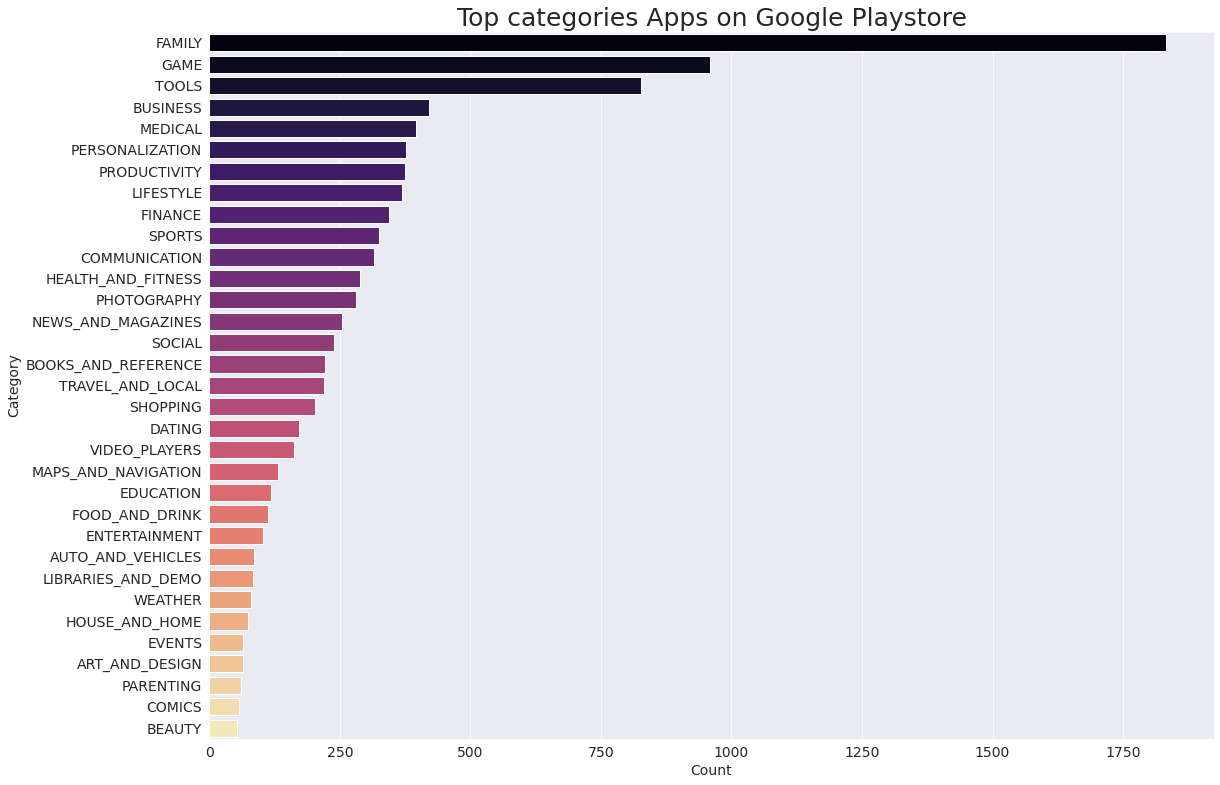

In [138]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = x_range, y = y_range, palette= "magma")
graph.set_title("Top categories Apps on Google Playstore", fontsize = 25);

###*from above plot we can see that there are almost 33 categories. In this plot topmost are `FAMILY` and `GAMES` and least are `COMICS` and `BEAUTY` Category are present.*